Ode Solver <br>
Simulation 447 <br>
By Grant Smith and Leo Petersen <br>

Ode Solver

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math

dt = 0.1  # Let some dt value be pretty low

def Euler(dt, f, t, y, *args):
    return y + f(t,y,args) * dt

def solve_ode(f, tspan, y0, method = Euler, *args, **options):

    y = [ y0[0] ] # Vector with initial position
    t = [ tspan[0] ] # Vector with initial time

    while t[-1] < tspan[1]:
        solved_value = method(dt, f, t[-1], y[-1], args) # Run some method given some function, f
        y.append(solved_value)
        t.append(t[-1] + dt)

    y = np.array(y) # Convert to numpy arrays at the end for speed
    t = np.array(t)
    return t, y

Simple Gravity

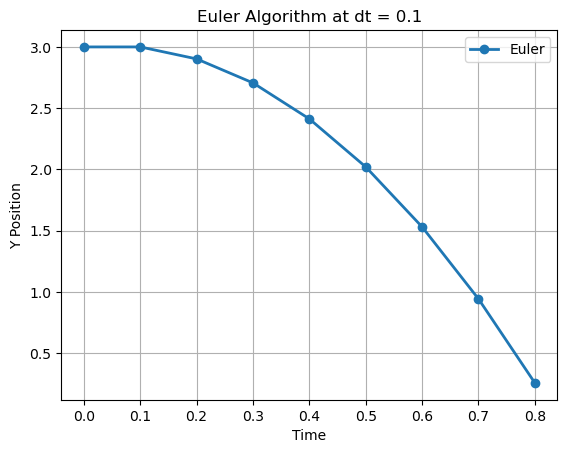

In [56]:
def simple_gravity(t, y, g):
    return -g[0][0]*t

g0 = 9.8 # Given bounds 
y0 = [3, 0]
t0 = [0, math.sqrt(6/g0)]
t, y = solve_ode(simple_gravity, t0, y0, Euler, g0) # Run the solver

# Plotting
plt.plot(t, y, 'o-', linewidth=2, label="Euler")
plt.grid(True)
plt.title("Euler Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()

Euler Cromer

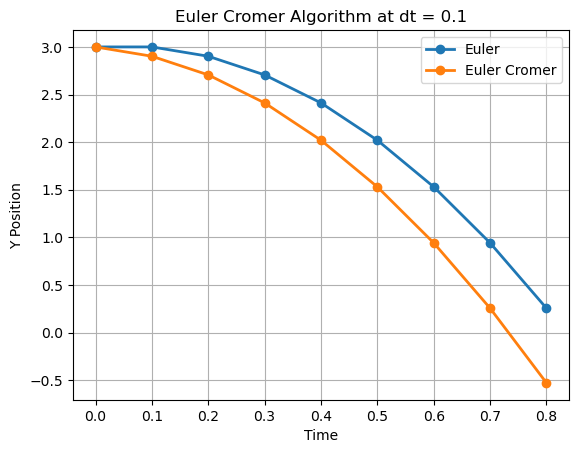

In [57]:
def Euler_Cromer(dt, f, t, y, *args):
    y_end = y + f(t, y, args) * dt # Calculate a y_end
    return y + f(t + dt, y_end, args) * dt

t, y = solve_ode(simple_gravity, t0, y0, Euler, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Cromer, g0) # Just add the extra algorithms
plt.plot(t, y, 'o-', linewidth=2, label="Euler Cromer")

plt.grid(True)
plt.title("Euler Cromer Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()

Euler Richardson

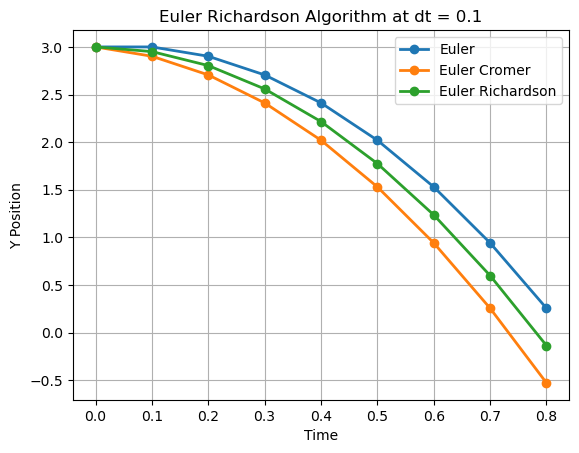

In [58]:
def Euler_Richardson(dt, f, t, y, *args):
    y_mid = y + f(t, y, args)*(dt/2) # Calculate y mid
    return y + f(t + dt/2, y_mid, args) * dt

t, y = solve_ode(simple_gravity, t0, y0, Euler, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Cromer, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler Cromer")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Richardson, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler Richardson")

plt.grid(True)
plt.title("Euler Richardson Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()

Finding slopes, for simplicity let us just examine the Euler function. We observered that Euler Richardson is the most accurate, so we use that and a near-0 dt in order to approximate the exact result. 

In [ ]:
dt = 0.001 # In case of reruning
t, y = solve_ode(simple_gravity, t0, y0, Euler, g0)

dt = 0.00001
t_optimal, y_optimal = solve_ode(simple_gravity, t0, y0, Euler_Richardson, g0) # Say this is the optimal solution

error = []
alphas = []

for i in range(1, len(t)-1):
    times = t[i], t[i]
    index, = np.where(np.isclose(t_optimal, t[i]))
    j = index[0]
    
    positions = y_optimal[j], y[i]
    plt.plot(times, positions, 'orange', label="Error")

    error_i = y[i] - y_optimal[j]
    error.append(error_i)
    l1 = math.log(error_i, t[i]) # Abuse logarithmic math to do this sure this is maybe an n solution vs a vectorized solution it's 1 am in the morning I don't care take the free point
    l2 = math.log(t[i], t[i])
    alphas.append(l1/l2)


plt.plot(t, y, 'o-', linewidth=2, label="Euler")
plt.plot(t_optimal, y_optimal, 'b-', linewidth=2, label="Euler")
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()


Print the error

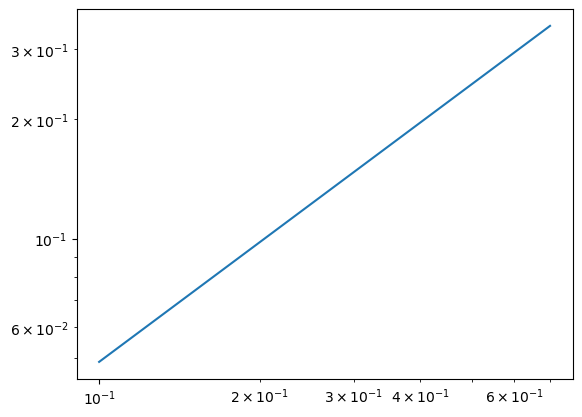

In [180]:
plt.loglog(t[1:len(t)-1], error)
plt.show()